# 1. Carga de datos

## Carga y Exploración Inicial
### Cargar el dataset, visualizar las primeras filas.

In [206]:
import pandas as pd

df = pd.read_csv('Housing.csv')

# Mostrar las primeras filas del dataset para explorar la estructura de los datos
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


### Total de tablas del dataset

In [207]:
# Información general sobre el dataset (tipos de datos y valores nulos)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


### Muestra de las primeras 5 filas y las últimas 5 filas para poder hacer comprobaciones

In [208]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Histogramas y cajas de valores atípicos

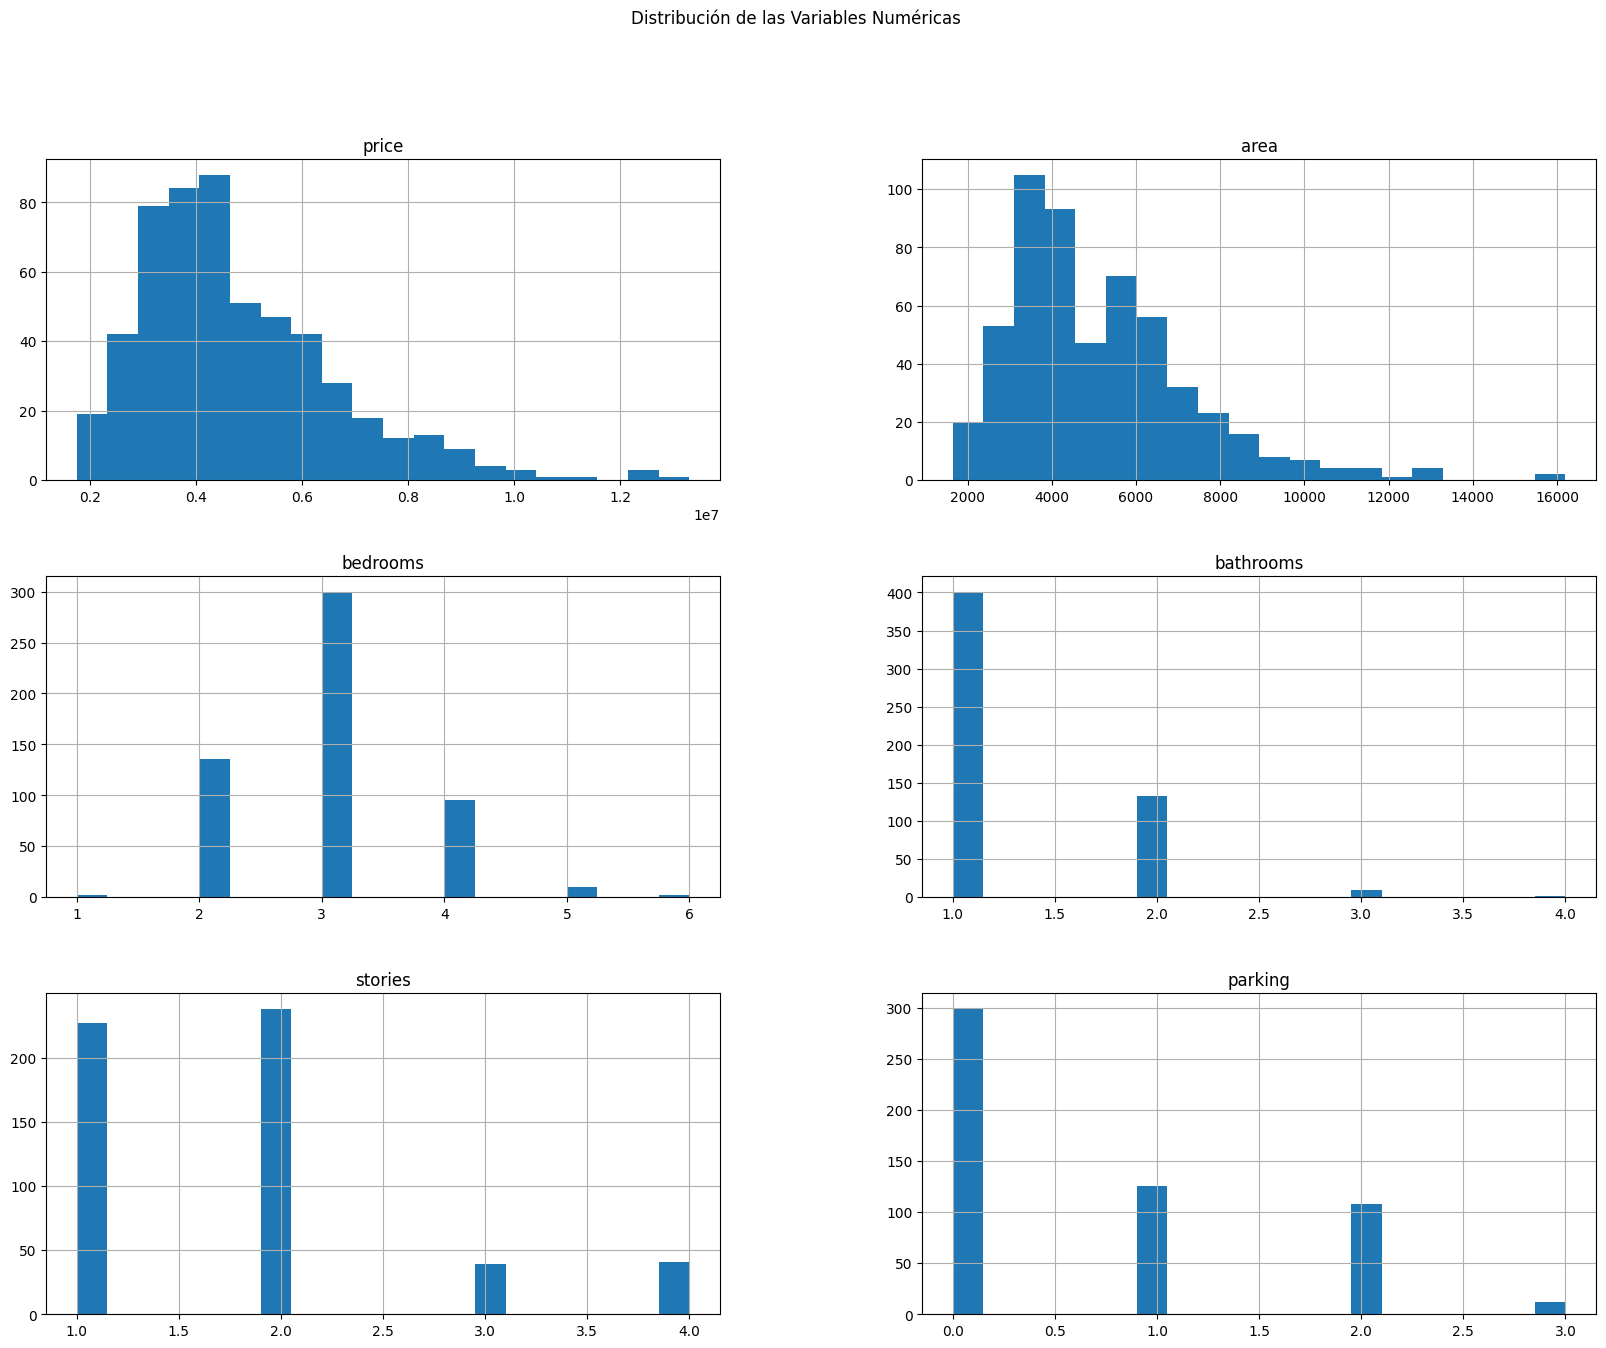

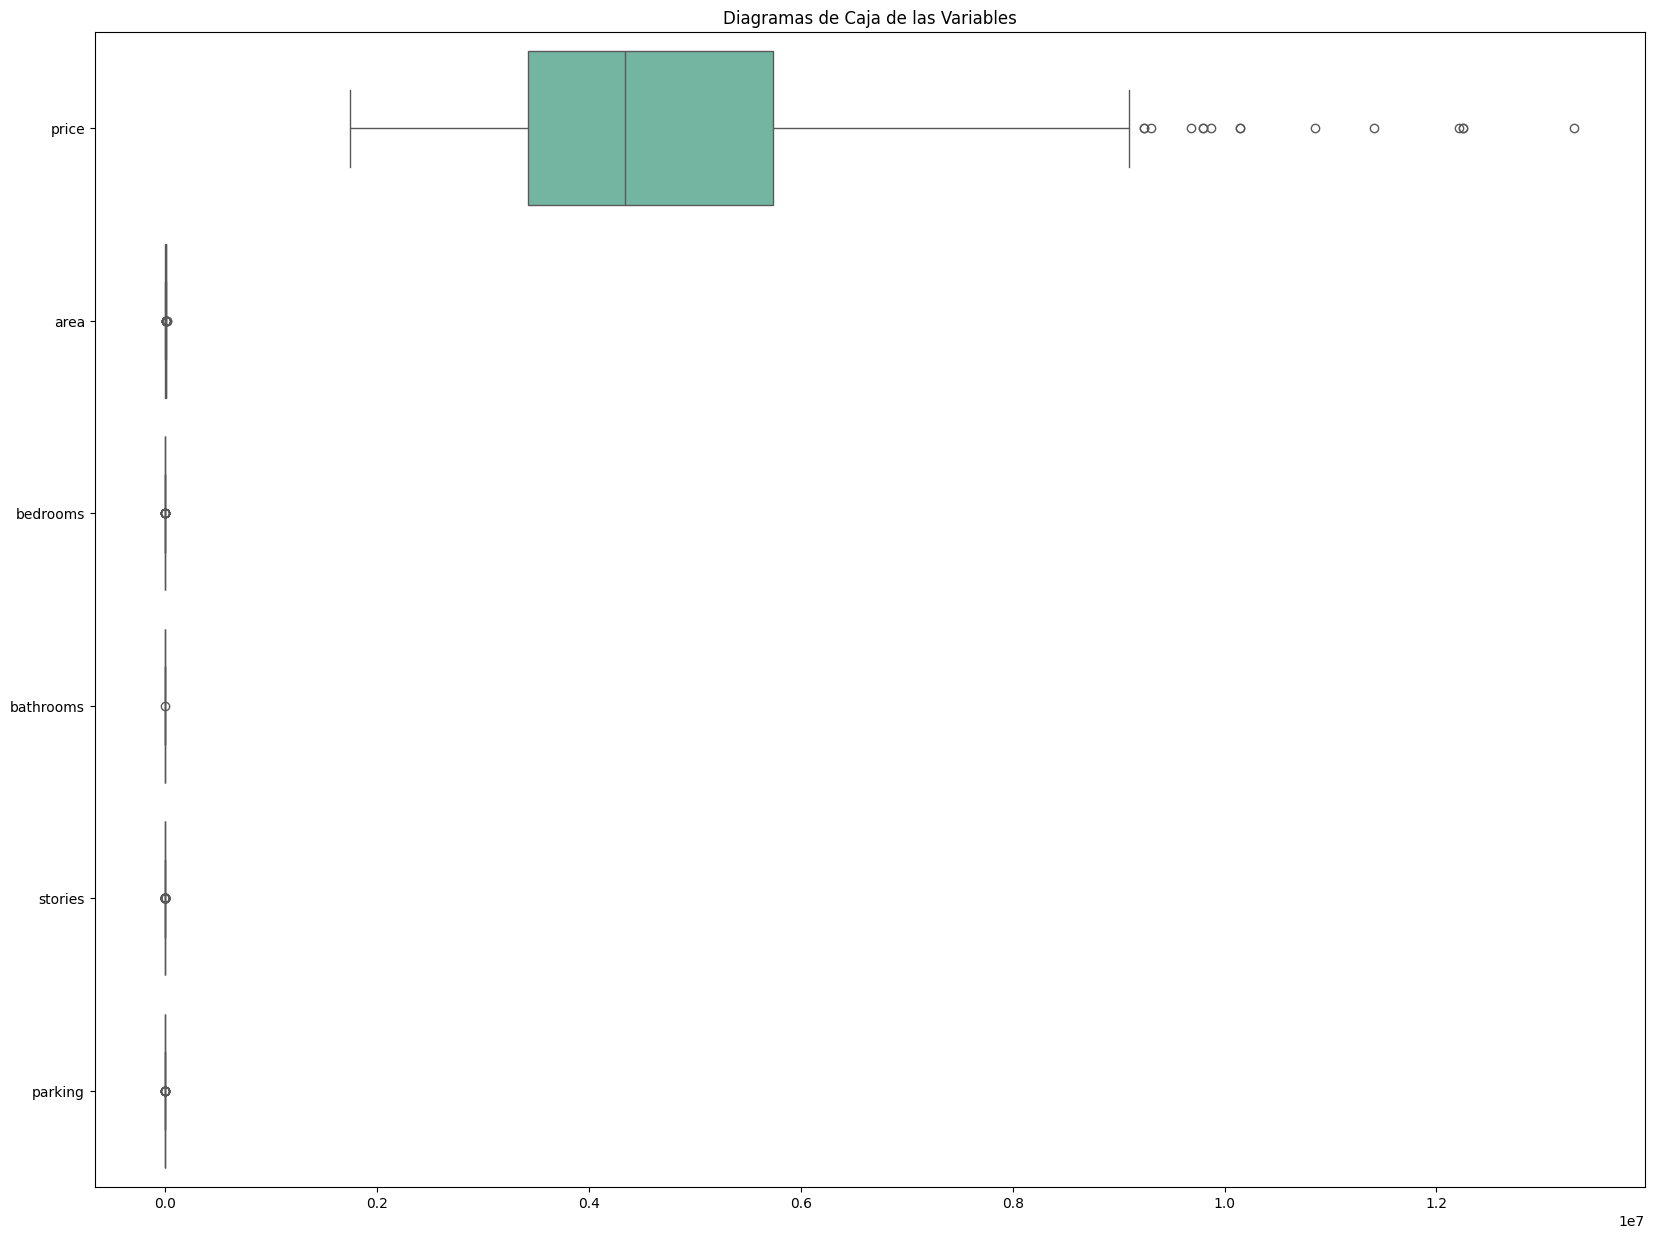

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar histogramas de las variables numéricas
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribución de las Variables Numéricas')
plt.show()

# Graficar diagramas de caja para detectar valores atípicos
plt.figure(figsize=(20, 15))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Diagramas de Caja de las Variables')
plt.show()

## Análisis de Correlación
- **Matriz de correlación para analizar relaciones entre variables.**

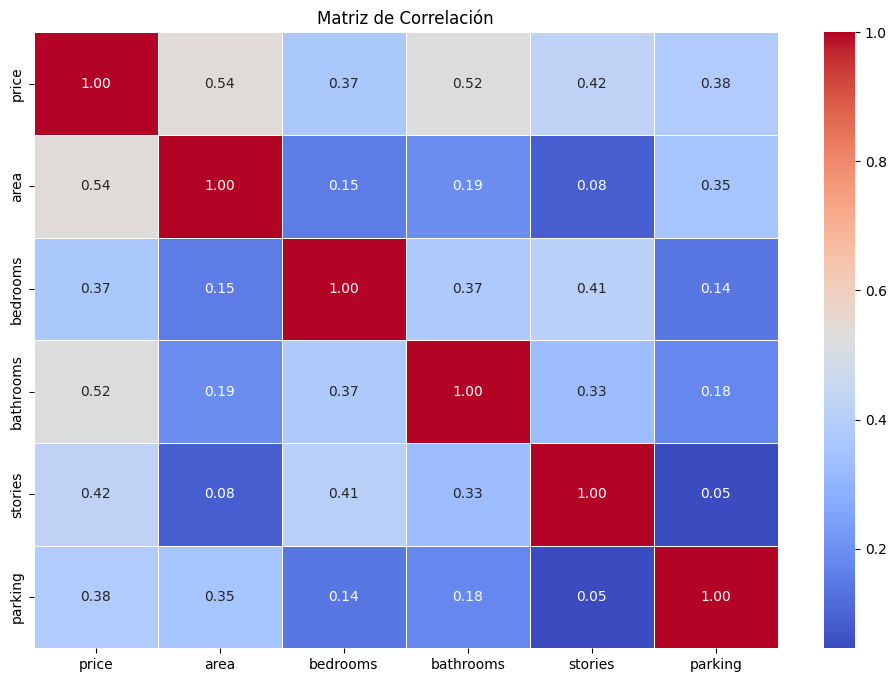

In [210]:
# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df.corr(numeric_only=True)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Añadir datos sintéticos al dataset para poder entrenar el modelo con un mayor número de datos

In [211]:
import pandas as pd
import numpy as np

def generar_datos_sinteticos(df, n, noise_level=0.05):
    df_synth = df.copy()

    # Seleccionamos columnas numéricas (puedes ajustar esto según necesidad)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Creamos n muestras aleatorias del dataset original
    df_sample = df.sample(n=n, replace=True).reset_index(drop=True)

    # Agregamos ruido
    for col in numeric_cols:
        std = df[col].std()
        noise = np.random.normal(0, noise_level * std, size=n)
        df_sample[col] += noise

    # Aseguramos que los enteros no pierdan su tipo
    for col in df.columns:
        if 'int' in str(df[col].dtype):
            df_sample[col] = df_sample[col].round().astype(int)

    return df_sample

df_sintetico = generar_datos_sinteticos(df, n=1500)
df = pd.concat([df, df_sintetico], ignore_index=True)

### Aplicación de label encoding a las columnas que usan yes-no y pasarlo a 1-0 para las transformaciones

In [212]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for 'furnishingstatus' ya que tiene mas de 3
df = pd.get_dummies(df, columns=['furnishingstatus'], dtype=int, prefix='furnishingstatus')

# Lista de columnas categóricas
categorical_cols = ['mainroad', 'guestroom',
                      'basement', 'hotwaterheating', 'airconditioning',
                      'prefarea']

# Aplicar Label Encoding a cada columna usando un nuevo LabelEncoder para cada una
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,4995305,2970,3,1,3,1,0,0,0,0,0,0,0,1,0
2041,4885339,2600,3,2,2,0,0,1,0,1,1,0,0,1,0
2042,2716826,2370,3,1,1,0,0,0,0,0,0,0,0,0,1
2043,3046891,2623,2,1,1,0,0,0,0,0,0,0,1,0,0


### Feature engineering

In [213]:
import pandas as pd

# 2. Crear nuevas características (features) que podrían mejorar el modelo, sin usar precio
# Tamaño de la propiedad por número de habitaciones (relación entre área y habitaciones)
df['area_per_bedroom'] = df['area'] / df['bedrooms']

# Número de baños por número de habitaciones
df['bathrooms_per_bedroom'] = df['bathrooms'] / df['bedrooms']

# Número de historias por área
df['stories_per_area'] = df['stories'] / df['area']

# Número de historias por número de baños
df['stories_per_bathroom'] = df['stories'] / df['bathrooms']

# 3. Obtener las columnas generadas por One-Hot Encoding
# Estas son las nuevas columnas para las características adicionales (conversión a variables dummy)
feature_columns = [col for col in df.columns if 'mainroad' in col or
                   'guestroom' in col or 'basement' in col or
                   'hotwaterheating' in col or 'airconditioning' in col or
                   'prefarea' in col]

# Contar cuántas de estas características adicionales están presentes
df['additional_features_count'] = df[feature_columns].sum(axis=1)

# Interacción entre el número de habitaciones y el número de baños
df['bedrooms_bathrooms_interaction'] = df['bedrooms'] * df['bathrooms']

# Interacción entre el área y las historias
df['area_stories_interaction'] = df['area'] * df['stories']

# 4. Verificar las primeras filas después de la transformación
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  ...  \
0         0                0                1  ...   
1         0                0                1  ...   
2         1                0                0  ...   
3         1                0                1  ...   
4         1                0                1  ...   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                           1                                0   
1                           1                                0   
2                           0               

#### Mostrar información con las nuevas columnas creadas

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            2045 non-null   int64  
 1   area                             2045 non-null   int64  
 2   bedrooms                         2045 non-null   int64  
 3   bathrooms                        2045 non-null   int64  
 4   stories                          2045 non-null   int64  
 5   mainroad                         2045 non-null   int64  
 6   guestroom                        2045 non-null   int64  
 7   basement                         2045 non-null   int64  
 8   hotwaterheating                  2045 non-null   int64  
 9   airconditioning                  2045 non-null   int64  
 10  parking                          2045 non-null   int64  
 11  prefarea                         2045 non-null   int64  
 12  furnishingstatus_fur

### Correlaciones con el precio

In [215]:
# Obtener la correlación con el precio
price_corr = correlation_matrix['price'].sort_values(ascending=False)

# Mostrar las variables más correlacionadas con el precio
print(price_corr)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


### Manejo de valores faltantes: Si existen, imputarlos con la mediana o la moda según el tipo de variable.

In [216]:
# Verificar los valores faltantes antes de la imputación
missing_before = df.isnull().sum()

# Imputar variables numéricas con la mediana
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Imputar variables categóricas con la moda
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verificar los valores faltantes después de la imputación
missing_after = df.isnull().sum()

# Comparar antes y después para verificar si se ha modificado alguna variable
modified = missing_before != missing_after

# Mensaje de cambio
if modified.any():
    print("Se han imputado valores faltantes en las siguientes columnas:")
    # Imprimir las columnas que han sido modificadas
    modified_columns = missing_before[missing_before != missing_after].index
    print(modified_columns)
else:
    print("No se han realizado cambios. No hay valores faltantes en el dataset.")

No se han realizado cambios. No hay valores faltantes en el dataset.


<ipython-input-216-42d3ecff8925>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


### División Train-Test
**Dividir los datos en entrenamiento y prueba (80/20).**

In [217]:
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import MinMaxScaler

# Definir las características (X) y la variable objetivo (y)
X = df.drop('price', axis=1)  # Eliminar la columna 'price' que es la variable objetivo
y = df['price']  # La variable objetivo es el precio

# Escalador para X (excluyendo 'price')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Escalador para y (solo 'price')
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # Cambiado aquí

# Guardar los escaladores
joblib.dump(scaler_X, 'scaler_X.joblib')
joblib.dump(scaler_y, 'scaler_y.joblib')

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

# Convertir los datos a arrays de NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


Tamaño de X_train: (1636, 21)
Tamaño de X_test: (409, 21)
Tamaño de y_train: (1636, 1)
Tamaño de y_test: (409, 1)


# 2. Model Planning

### Creación de redes neuronales

In [220]:
def create_model(optimizer='adam', dropout_rate=0.17):
    model = Sequential()

    # Capa de entrada (21 neuronas, una por cada característica)
    model.add(Dense(21, input_dim=X_train.shape[1], activation='relu'))

    # Capas ocultas (4 capas densas con activación ReLU)
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # Capa de salida (1 neurona, activación lineal)
    model.add(Dense(1, activation='linear'))
    # Compilar el modelo
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model

### Creación y entrenamiento del modelo

In [221]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Crear modelo con Adam
model = create_model(optimizer=Adam())

# Configurar EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Puede ser 'val_loss' o 'val_accuracy'
    patience=15,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos cuando se detiene el entrenamiento
)

# Configurar ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # Ruta donde se guardará el mejor modelo
    monitor='val_loss',  # Métrica a monitorear
    save_best_only=True,  # Guardar solo si el modelo mejora
    mode='min',  # Guardar cuando 'val_loss' sea mínimo
    verbose=1
)

# Entrenar el modelo con ambos callbacks
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]  # Agregar los callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
75/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183
Epoch 1: val_loss improved from inf to 0.00698, saving model to best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0178 - val_loss: 0.0070
Epoch 2/300
63/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 2: val_loss improved from 0.00698 to 0.00630, saving model to best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - val_loss: 0.0063
Epoch 3/300
61/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074
Epoch 3: val_loss improved from 0.00630 to 0.00574, saving model to best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074 - val_loss: 0.0057
Epoch 4/300
61/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065
Epoch 4: val_loss improved from 0.00574 to 0.00549, saving model to best_model.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 5/300
77/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061
Epoch 5: val_loss did not improve from 0.0

### Una vez entrenado el modelo mostrar datos de evaluación

In [222]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el mejor modelo guardado
best_model = load_model('best_model.keras')

# Predecir valores en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calcular el porcentaje de RMSE
rmse_percentage = (rmse / np.mean(y_test)) * 100

print(f"🔍 Evaluación del modelo:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"RMSE %: {rmse_percentage:.2f}%")
print(f"R²: {r2}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
🔍 Evaluación del modelo:
MAE: 0.021575228185869363
RMSE: 0.03465480413531754
MSE: 0.0012009554496572215
RMSE %: 13.25%
R²: 0.94851820093374


# 3. Análisis de resultados

### Gráfica de predicciones y valores reales

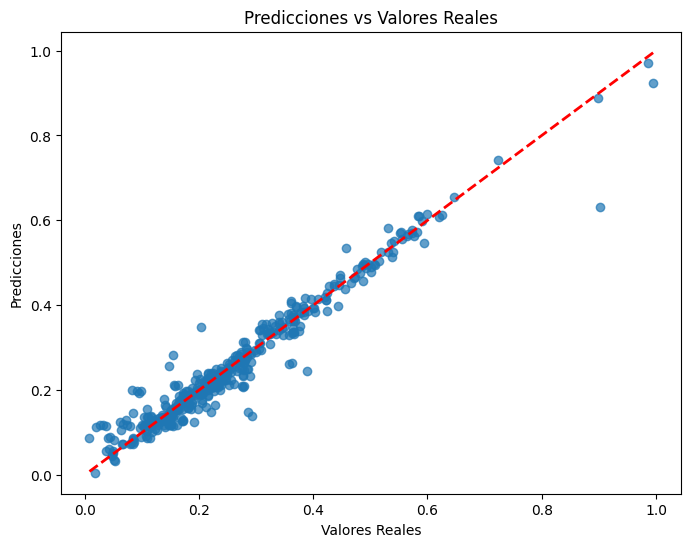

In [223]:
import matplotlib.pyplot as plt

# Predicciones vs Reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de identidad
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

### Desnormalización de precio y ver el precio predicho y el precio real con su porcentaje de error

In [224]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Asumimos que `scaler_y` ya fue ajustado con los datos originales
# Ejemplo: scaler_y.fit_transform(y_train.reshape(-1, 1))

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Asegurarte de que los datos tienen la forma correcta
y_test = y_test.reshape(-1, 1)  # Convertir a bidimensional si es necesario
y_pred = y_pred.reshape(-1, 1)  # Convertir a bidimensional si es necesario

# Imprimir las formas para verificar
print(y_test.shape)  # Debe ser algo como (n, 1)
print(y_pred.shape)  # Debe ser algo como (n, 1)

# Invertir la escala de los valores predichos y reales
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred)

# Calcular el % de error absoluto
error_porcentual = np.abs((y_test_original - y_pred_original) / y_test_original) * 100

# Crear un DataFrame con los valores reales, predichos y el error %
df = pd.DataFrame({
    'Precio Real': y_test_original.flatten(),
    'Precio Predicho': y_pred_original.flatten(),
    'Error %': error_porcentual.flatten()
})

# Mostrar el DataFrame
print(df)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(409, 1)
(409, 1)
     Precio Real  Precio Predicho    Error %
0      4193000.0       4244617.00   1.231028
1      4200932.0       3872502.50   7.818015
2      3675000.0       3762144.50   2.371279
3      2940000.0       2913302.00   0.908095
4      5304633.0       5536909.00   4.378738
..           ...              ...        ...
404    3880313.0       3742117.75   3.561446
405    5466924.0       5584000.50   2.141542
406    3634701.0       3229945.25  11.135875
407    7404904.0       7039627.00   4.932907
408    7367431.0       7466887.50   1.349948

[409 rows x 3 columns]


### Gráfica de errores

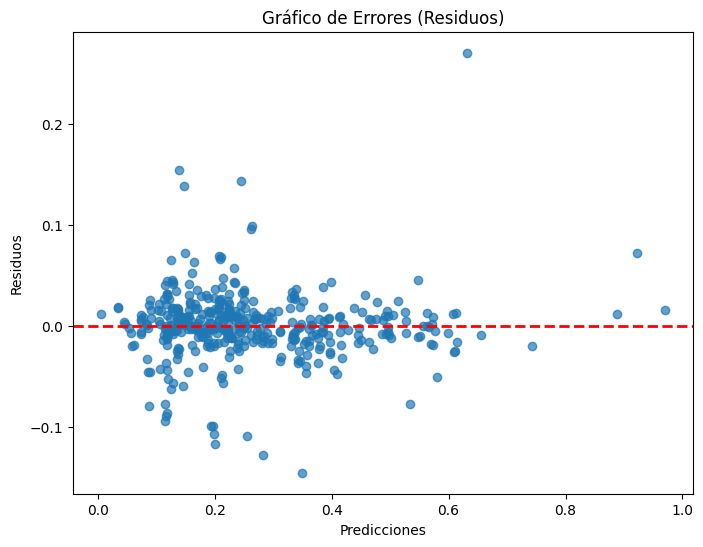

In [225]:
# Cálculo de los errores (residuos)
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title("Gráfico de Errores (Residuos)")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

### Histograma de errores

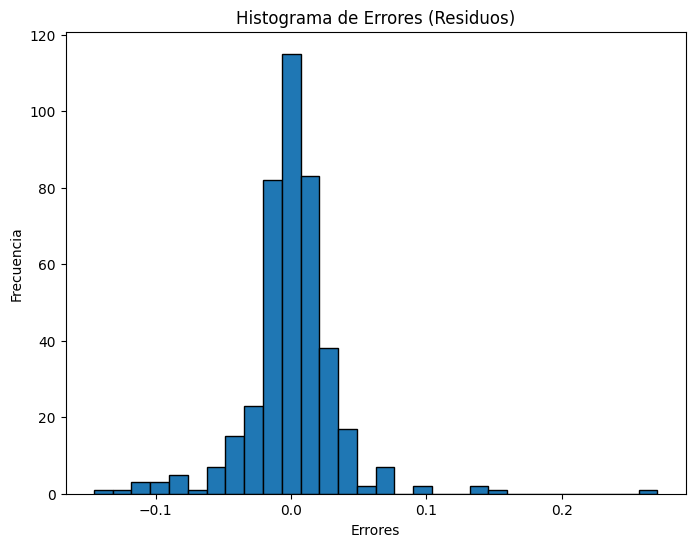

In [226]:
# Histograma de los errores
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histograma de Errores (Residuos)")
plt.xlabel("Errores")
plt.ylabel("Frecuencia")
plt.show()